In [10]:
import pandas as pd

In [11]:
data = {
    "review": [
        "This product is amazing and works perfectly",
        "Worst experience ever, very disappointed",
        "It is okay, not bad but not great either",
        "Excellent quality and fast delivery",
        "The product stopped working after one day",
        "Average performance, nothing special",
        "I am very happy with this purchase",
        "Terrible service and poor quality",
        "Not good, not bad, just okay",
        "Loved it, highly recommended"
    ],
    "sentiment": [
        "positive",
        "negative",
        "neutral",
        "positive",
        "negative",
        "neutral",
        "positive",
        "negative",
        "neutral",
        "positive"
    ]
}

In [12]:
df = pd.DataFrame(data)
df

,review,sentiment
0,This product is amazing and works perfectly,positive
1,"Worst experience ever, very disappointed",negative
2,"It is okay, not bad but not great either",neutral
3,Excellent quality and fast delivery,positive
4,The product stopped working after one day,negative
5,"Average performance, nothing special",neutral
6,I am very happy with this purchase,positive
7,Terrible service and poor quality,negative
8,"Not good, not bad, just okay",neutral
9,"Loved it, highly recommended",positive


In [13]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text
df["review"] = df["review"].apply(clean_text)
df

,review,sentiment
0,this product is amazing and works perfectly,positive
1,worst experience ever very disappointed,negative
2,it is okay not bad but not great either,neutral
3,excellent quality and fast delivery,positive
4,the product stopped working after one day,negative
5,average performance nothing special,neutral
6,i am very happy with this purchase,positive
7,terrible service and poor quality,negative
8,not good not bad just okay,neutral
9,loved it highly recommended,positive


In [14]:
from tensorflow.keras.utils import to_categorical
df["sentiment"] = df["sentiment"].map({
    "negative": 0,
    "neutral": 1,
    "positive": 2
})

y = to_categorical(df["sentiment"], num_classes=3)
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df["review"])
tokenizer.word_index

{'not': 1,
 'and': 2,
 'this': 3,
 'product': 4,
 'is': 5,
 'very': 6,
 'it': 7,
 'okay': 8,
 'bad': 9,
 'quality': 10,
 'amazing': 11,
 'works': 12,
 'perfectly': 13,
 'worst': 14,
 'experience': 15,
 'ever': 16,
 'disappointed': 17,
 'but': 18,
 'great': 19,
 'either': 20,
 'excellent': 21,
 'fast': 22,
 'delivery': 23,
 'the': 24,
 'stopped': 25,
 'working': 26,
 'after': 27,
 'one': 28,
 'day': 29,
 'average': 30,
 'performance': 31,
 'nothing': 32,
 'special': 33,
 'i': 34,
 'am': 35,
 'happy': 36,
 'with': 37,
 'purchase': 38,
 'terrible': 39,
 'service': 40,
 'poor': 41,
 'good': 42,
 'just': 43,
 'loved': 44,
 'highly': 45,
 'recommended': 46}

In [16]:
sequences = tokenizer.texts_to_sequences(df["review"])
sequences

[[3, 4, 5, 11, 2, 12, 13],
 [14, 15, 16, 6, 17],
 [7, 5, 8, 1, 9, 18, 1, 19, 20],
 [21, 10, 2, 22, 23],
 [24, 4, 25, 26, 27, 28, 29],
 [30, 31, 32, 33],
 [34, 35, 6, 36, 37, 3, 38],
 [39, 40, 2, 41, 10],
 [1, 42, 1, 9, 43, 8],
 [44, 7, 45, 46]]

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(sequences, maxlen=20)
X

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  4,  5,
        11,  2, 12, 13],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
        15, 16,  6, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  5,  8,  1,  9,
        18,  1, 19, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,
        10,  2, 22, 23],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  4, 25,
        26, 27, 28, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        30, 31, 32, 33],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 34, 35,  6,
        36, 37,  3, 38],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 39,
        40,  2, 41, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 42,
         1,  9, 43,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        44,  7, 45, 46]], dtype=int32)

In [19]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

47

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((8, 20), (2, 20))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=20))
model.add(LSTM(32))
model.add(Dense(3, activation="softmax"))

C:\Users\Sakshi Jadhav\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [24]:
model.build(input_shape=(None, 20))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 20, 32)              │           1,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,923 (38.76 KB)

 Trainable params: 9,923 (38.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=2,
    validation_split=0.2
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.3333 - loss: 1.1016 - val_accuracy: 0.5000 - val_loss: 1.0954
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6667 - loss: 1.0948 - val_accuracy: 0.5000 - val_loss: 1.0924
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8333 - loss: 1.0897 - val_accuracy: 1.0000 - val_loss: 1.0919
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8333 - loss: 1.0842 - val_accuracy: 1.0000 - val_loss: 1.0931
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8333 - loss: 1.0797 - val_accuracy: 0.5000 - val_loss: 1.0940
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8333 - loss: 1.0723 - val_accuracy: 1.0000 - val_loss: 1.0913
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 1.0662 - val_accuracy: 1.0000 - val_loss: 1.0896
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.0574 - val_accuracy: 1.0000 - val_loss: 1.0895

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.5000 - loss: 1.0844
Test Accuracy: 0.5


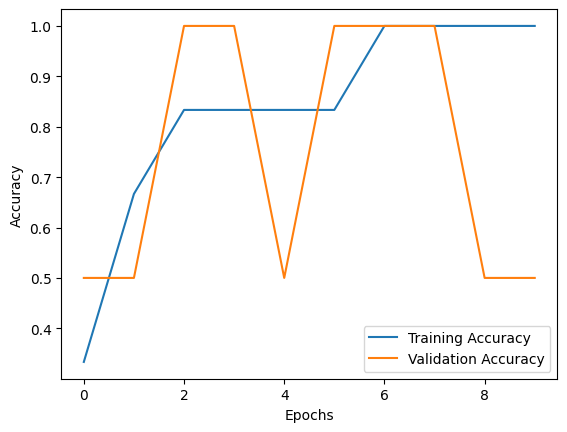

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

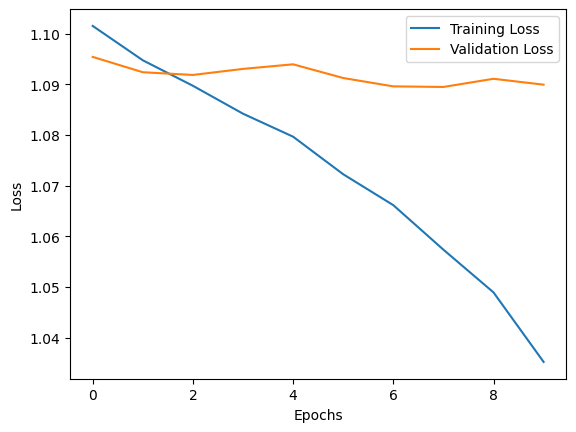

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


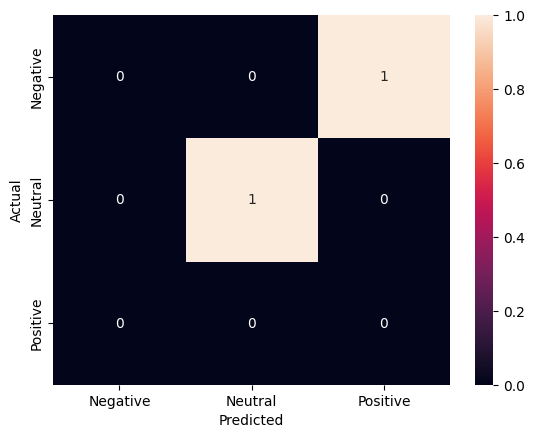

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(
    cm, annot=True, fmt="d",
    xticklabels=["Negative","Neutral","Positive"],
    yticklabels=["Negative","Neutral","Positive"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()